In [ ]:
r"J:\R JEEVAN\B.TECH CYS\4th Sem\Machine Learning\ML Project\CICEVSE2024_Dataset\Power Consumption"

Outliers per column:
shunt_voltage    1
bus_voltage_V    0
current_mA       1
power_mW         2
dtype: int64


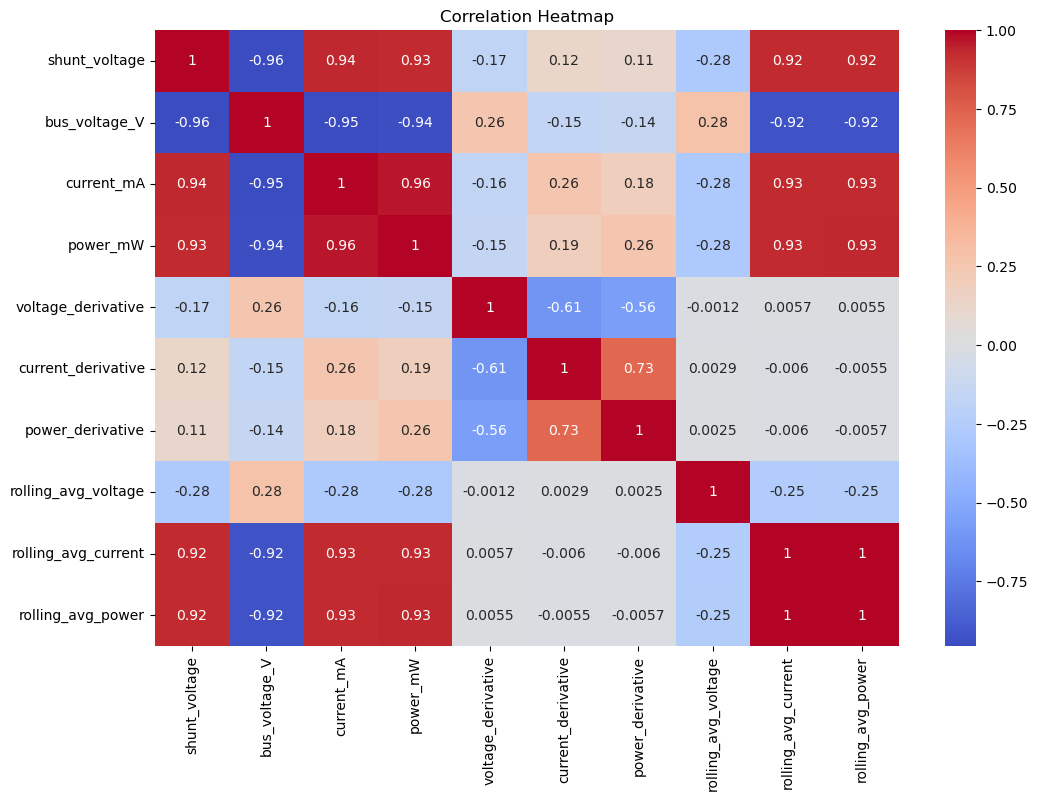

Preprocessing complete! Saved to 'Preprocessed_EVSE_B_PowerCombined.csv'


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('J:\\R JEEVAN\\B.TECH CYS\\4th Sem\\Machine Learning\\ML Project\\CICEVSE2024_Dataset\\Power Consumption\\EVSE-B-PowerCombined.csv')

# 1. Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 2. Feature Engineering
# Extract time-based features
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek

# Rolling averages to capture trends
df['rolling_avg_voltage'] = df['bus_voltage_V'].rolling(window=10).mean()
df['rolling_avg_current'] = df['current_mA'].rolling(window=10).mean()
df['rolling_avg_power'] = df['power_mW'].rolling(window=10).mean()

# Rate of change (derivatives)
df['voltage_derivative'] = df['bus_voltage_V'].diff()
df['current_derivative'] = df['current_mA'].diff()
df['power_derivative'] = df['power_mW'].diff()

# 3. Handle missing values (fill NaN from rolling/diff operations)
df.fillna(0, inplace=True)

# 4. Outlier detection using Z-score
z_scores = np.abs((df[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']] - df[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']].mean()) / df[['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW']].std())
outliers = (z_scores > 3).sum()
print("Outliers per column:")
print(outliers)

# 5. Encode categorical features
label_encoders = {}
categorical_columns = ['State', 'Attack', 'Attack-Group', 'Label', 'interface']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 6. Scale numerical features
scaler = StandardScaler()
numerical_columns = ['shunt_voltage', 'bus_voltage_V', 'current_mA', 'power_mW', 'voltage_derivative', 'current_derivative', 'power_derivative', 'rolling_avg_voltage', 'rolling_avg_current', 'rolling_avg_power']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# 7. Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Save preprocessed data
df.to_csv('J:\\R JEEVAN\\B.TECH CYS\\4th Sem\\Machine Learning\\ML Project\\CICEVSE2024_Dataset\\Power Consumption\\Preprocessed_EVSE_B_PowerCombined.csv', index=False)

print("Preprocessing complete! Saved to 'Preprocessed_EVSE_B_PowerCombined.csv'")